# <div style="text-align:center">3η Εργασία</div>

Στην παρούσα εργασία θα ασχοληθείτε με την πρόβλεψη μουσικού είδους από σήματα
μουσικής με τη χρήση νευρωνικών δικτύων. Πιο συγκεκριμένα, ο στόχος της εργασία είναι
να ταξινομήσουμε 1 δευτερόλεπτο μουσικού σήματος στα εξής είδη: κλασσική μουσική, ποπ,
ροκ, και μπλουζ. Για κάθε 1 δευτερόλεπτο σας παρέχονται δύο ειδών αναπαραστάσεις του
ηχητικού σήματος: (i) MFCCs, και (ii) mel-spectograms. <br><br>
Τα MFCCs είναι συντελεστές του φάσματος ισχύος μετασχηματισμένοι με βάση την κλίμακα
mel, μία κλίμακα που είναι κοντά στον τρόπο που αντιλαμβάνεται ο άνθρωπος τα ηχητικά
σήματα μέσω της ακοής. Στην δική μας περίπτωση χρησιμοποιούμε 13 συντελεστές οι οποίοι
υπολογίζονται για κάθε 50 msec και επομένως για κάθε μουσικό κομμάτι του dataset
προκύπτει μία ακολουθία από 20 feature vectors διάστασης 13. Για να αναπαραστήσουμε
αυτή την πληροφορία μέσω ενός στατικού διανύσματος, το οποίο είναι ευκολότερο στην
χρήση, υπολογίζουμε για κάθε έναν από τους 13 συντελεστές την μέση τιμή και την τυπική
του απόκλιση από την ακολουθία των 20 χρονικών στιγμών. Καταλήγουμε λοιπόν με ένα
διάνυσμα 26 χαρακτηριστικών για κάθε μουσικό κομμάτι του dataset. <br><br>
To φασματογράφημα (spectrogram), που είναι ο δεύτερος τρόπος αναπαράστασης που θα
χρησιμοποιήσουμε, είναι μία δισδιάστατη αναπαράσταση που δείχνει την χρονική εξέλιξη
του φάσματος συχνοτήτων. Εάν στο spectrogram εφαρμόσουμε την κλίμακα mel, παίρνουμε
το mel-spectrogram ή melgram με το οποίο και θα δουλέψουμε στην παρούσα εργασία.<br><br>
Υπολογίζοντας και αντιστρέφοντας τους άξονες χρόνου και συχνότητας, προκύπτει για κάθε
στοιχείο του συνόλου δεδομένων ένας πίνακας 21 (χρόνος) x 128 (συχνότητα).<br><br>
Τα δεδομένα που θα χρησιμοποιήσετε βρίσκονται εδώ και είναι χωρισμένα στα σύνολα
training (3200 δείγματα), validation (800 δείγματα) και test (1376 δείγματα) sets, τα οποία
θα χρησιμοποιηθούν για εκπαίδευση, εύρεση υπερπαραμέτρων και αξιολόγηση της
ικανότητας γενίκευσης αντίστοιχα.<br><br>
Ακολουθήστε τις οδηγίες των παρακάτω ερωτημάτων και ετοιμάστε τις απαντήσεις σας
τρέχοντας τον κώδικά σας στο Google Colab. Το framework που θα πρέπει να χρησιμοποιηθεί
για τον προγραμματισμό των νευρωνικών είναι υποχρεωτικά το Pytorch.



### <div style="text-align:center"> [Ερώτημα 1: Feedforward Neural Network] </div>
*Βήμα 1: Φόρτωση δεδομένων (mfccs)* <br><br>
Ξεκινάμε φορτώνοντας τα mfcc δεδομένα για train, validation και test μέσω των αντίστοιχων
numpy αρχείων X.npy και labels.npy. Στην συνέχεια μετασχηματίζουμε τα labels από strings
(classical, blues etc) σε ακέραιους αριθμούς από 0 μέχρι 3, κρατώντας το αντίστοιχο mapping
από τα ονόματα των κλάσεων στους ακεραίους. Τέλος φορτώνουμε τα δεδομένα μας σε 3
Pytorch dataloaders (ένα για κάθε σύνολο δεδομένων) με batch size 16, ώστε να μπορούν
να χρησιμοποιηθούν στα μοντέλα μας. Δώστε επίσης το όρισμα shuffle=True στους train και
validation dataloaders.<br><br>
*Βήμα 2: Ορισμός Νευρωνικού Δικτύου*<br><br>
Ορίστε μία κλάση πλήρως συνδεδεμένου Νευρωνικού Δικτύου (fully connected neural
nework) το οποίο να αποτελείται από τα 4 επίπεδα με αριθμούς νευρώνων 26, 128, 32 και 4
αντίστοιχα, όπου 26 είναι η διάσταση της εισόδου και 4 ο αριθμός των κλάσεων που θα
προβλεφθούν.<br><br>
*Βήμα 3: Ορισμός διαδικασίας εκπαίδευσης*<br><br>
Ορίστε μία συνάρτηση που θα είναι αρμόδια για την εκπαίδευση του δικτύου. Συγκεκριμένα,
δεδομένου ενός αριθμού εποχών, ενός optimizer, ενός dataloader, μιας συνάρτησης
κόστους και ενός νευρωνικού θα περνάει κάθε batch από το νευρωνικό, θα υπολογίζει και
θα τυπώνει το loss και θα ενημερώνει τα βάρη, ενώ θα τερματίζει επιστρέφοντας το
νευρωνικό δίκτυο, όταν ο αριθμός των εποχών επιτευχθεί.<br><br>
*Βήμα 4: Ορισμός διαδικασίας αξιολόγησης*<br><br>
Ορίστε αντίστοιχα μία συνάρτηση αξιολόγησης, η οποία θα περνάει όλα τα batches ενός
dataloader από το μοντέλο παίρνοντας τις προβλέψεις του και χωρίς να ενημερώνει τα βάρη.
Μέσω των προβλέψεων θα υπολογίζει και θα επιστρέφει (i) το loss, (ii) τo f1 macro averaged,
(iii) το accuracy, και (iv) confusion matrix.<br><br>
*Βήμα 5: Εκπαίδευση δικτύου*<br><br>
Εκπαιδεύστε το νευρωνικό δίκτυο στο training set χρησιμοποιώντας τα εξής:
* optimizer: `stochastic gradient descent`
* learning rate: `0.002`
* loss function: `cross-entropy loss`
* αριθμός εποχών: `30`

Στην συνέχεια χρησιμοποιήστε την συνάρτηση αξιολόγησης του προηγούμενου ερωτήματος
για να υπολογίσετε τις επιδόσεις του εκπαιδευμένου μοντέλου στο test set. Τι επιδόσεις
πετυχαίνετε;<br><br>
*Βήμα 6: Εκπαίδευση δικτύου με GPU*<br><br>
Επαναλάβετε το βήμα 5, αλλά αυτή την φορά να έχετε αρχικά μεταφέρει τα δεδομένα και το
αρχικοποιημένο νευρωνικό σας δίκτυο στην GPU του colab. Βεβαιωθείτε ότι η εκπαίδευση
τρέχει στην GPU και τυπώστε τις διαφορές στους χρόνους εκτέλεσης σε GPU και CPU.
Βεβαιωθείτε ότι το colab session σας περιλαμβάνει χρήση GPU - η οποία είναι δωρεάν.<br><br>
*Βήμα 7: Επιλογή μοντέλου*<br><br>
Κατά την διάρκεια εκπαίδευσης (30 εποχές) προκύπτουν διαφορετικά στιγμιότυπα του
νευρωνικού μας, δηλαδή μοντέλα που έχουν διαφορετικά βάρη. Κατά την διαδικασία
βελτιστοποίησης, δεν γνωρίζουμε ποιο στιγμιότυπο του μοντέλου μας έχει την καλύτερη
δυνατότητα γενίκευσης. Για τον λόγο αυτό θα χρησιμοποιήσουμε το validation set στο τέλος
κάθε εποχής ώστε να αξιολογούμε τα στιγμιότυπα του μοντέλου. Αποθηκεύστε το μοντέλο
που έχει την καλύτερη επίδοση στην μετρική f1 για το validation set και χρησιμοποιήστε το
για να μετρήσετε την απόδοση στο test set. Σχολιάστε τα αποτελέσματα.<br><br>
Για τα επόμενα βήματα της εργασίας θα πρέπει να εργάζεστε με τον ίδιο τρόπο
χρησιμοποιώντας το validation set για να βρείτε το κατάλληλο στιγμιότυπο

In [21]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import os
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset

# Step 1
main_path = '/content/drive/MyDrive/Colab Notebooks/data/music_genre_data_di'
#main_path = 'data/music_genre_data_di'
# Loading Training Data
x_train = np.load(main_path + '/train/mfccs/X.npy')
y_train = np.load(main_path + '/train/mfccs/labels.npy')
# Loading Test Data
x_test = np.load(main_path + '/test/mfccs/X.npy')
y_test = np.load(main_path + '/test/mfccs/labels.npy')
# Loading Validation Data
x_val = np.load(main_path + '/val/mfccs/X.npy')
y_val = np.load(main_path + '/val/mfccs/labels.npy')
# Create the dictionary matching every genre to its index in the unique values of the train array
unique_values = np.unique(y_train)
replacement_dict = {value: i for i, value in enumerate(unique_values)}
# Replace the values in each of the arrays with the values from the dictionary
for i in range(len(unique_values)):
    y_train = np.where(y_train == unique_values[i], replacement_dict[unique_values[i]], y_train)
    y_test = np.where(y_test == unique_values[i], replacement_dict[unique_values[i]], y_test)
    y_val = np.where(y_val == unique_values[i], replacement_dict[unique_values[i]], y_val)
# Replace the ints encoded as strings to plain ints
y_train = y_train.astype(int)
y_test = y_test.astype(int)
y_val = y_val.astype(int)
# Create tensors from numpuarrays
x_train = torch.from_numpy(x_train).float() # There was a type mismatch float64 instead of float32
y_train = torch.from_numpy(y_train).long() # And another type mismatch for long instead of int
x_test = torch.from_numpy(x_test).float()
y_test = torch.from_numpy(y_test).long()
x_val = torch.from_numpy(x_val).float()
y_val = torch.from_numpy(y_val).long()
# Creating datasets
train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)
val_dataset = TensorDataset(x_val, y_val)
# Load on dataloders
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_dataset , batch_size=16, shuffle=False)
val_dataloader = DataLoader(val_dataset,batch_size=16, shuffle=True)

In [23]:
from torch import nn

# Step 2
# Ορίστε μία κλάση πλήρως συνδεδεμένου Νευρωνικού Δικτύου (fully connected neural nework)
# το οποίο να αποτελείται από τα 4 επίπεδα με αριθμούς νευρώνων 26, 128, 32 και 4 αντίστοιχα,
# όπου 26 είναι η διάσταση της εισόδου και 4 ο αριθμός των κλάσεων που θα προβλεφθούν.

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # 26 --> 128 --> 32 --> 4
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(26, 128),  # 26 --> 128
            nn.ReLU(),
            nn.Linear(128, 32),    # 128 --> 32
            nn.ReLU(),
            nn.Linear(32, 4),     # 32 --> 4
        )
    # Every nn.Module subclass implements the operations on input data in the forward method.
    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [24]:
# Step 3
# Ορίστε μία συνάρτηση που θα είναι αρμόδια για την εκπαίδευση του δικτύου.
# Συγκεκριμένα, δεδομένου ενός αριθμού εποχών, ενός optimizer, ενός dataloader,
# μιας συνάρτησης κόστους και ενός νευρωνικού θα περνάει κάθε batch από το νευρωνικό,
# θα υπολογίζει και θα τυπώνει το loss και θα ενημερώνει τα βάρη,
# ενώ θα τερματίζει επιστρέφοντας το νευρωνικό δίκτυο, όταν ο αριθμός των εποχών επιτευχθεί.
def train_neural_network(epochs, optimizer, dataloader, cost_function, model, device):
    for epoch in range(epochs):
        # for every batch
        for X, y in dataloader:
            # if using gpu dont forget to move the data there
            X = X.to(device)
            y = y.to(device)
            # Compute prediction and loss
            pred = model(X)
            loss = cost_function(pred, y)
            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print("Epoch: ",epoch," loss is ", loss.item())

In [45]:
# Step 4
# Ορίστε αντίστοιχα μία συνάρτηση αξιολόγησης,
# η οποία θα περνάει όλα τα batches ενός dataloader από το μοντέλο παίρνοντας τις προβλέψεις του
# και χωρίς να ενημερώνει τα βάρη. Μέσω των προβλέψεων θα υπολογίζει και θα επιστρέφει
# (i) το loss,
# (ii) τo f1 macro averaged,
# (iii) το accuracy, και
# (iv) confusion matrix.
def evaluate_neural_network(dataloader,model,loss_function,device):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0

    # I used my knowledge of the number of classes but maybe it should be a parameter of the function
    true_positives = [0, 0, 0, 0]
    false_positives = [0, 0, 0, 0]
    false_negatives = [0, 0, 0, 0]
    true_negatives = [0, 0, 0, 0]

    model.eval()
    with torch.no_grad():
        for X,y in dataloader:
            X = X.to(device)
            y = y.to(device)

            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

            # confusion matrix calculation
            predictions = pred.argmax(1)
            for i in range(len(predictions)): # for every prediction
                if predictions[i] == y[i]: # if the prediction is true
                    true_positives[y[i]] += 1 # increment the true positives of this class
                    for x in range(4): # and for every class
                        if x != y[i]: # that it is not the predicted class
                            true_negatives[x] += 1 # incremenet the true negatives
                else: # else if the prediction was not correct
                    false_positives[predictions[i]] += 1 # the increment the false positives for the predicted class
                    false_negatives[y[i]] += 1 # increment the false negatives for the correct class
                    for x in range(4): # and for every other class
                        if x != y[i] and x != predictions[i]: # that is not one of the two other classes
                            true_negatives[x] += 1 # incremenet the true negatives


    precision = [0,0,0,0]
    recall = [0,0,0,0]
    f1 = [0,0,0,0]
    for i in range(4):
        # precision = true positives/(true positives + false positives)
        precision[i] = true_positives[i]/(true_positives[i] + false_positives[i])
        # recall = true positives / (true positives + false negatives)
        recall[i] = true_positives[i]/(true_positives[i] + false_negatives[i])
        #f1 = 2 * precision * recall / (precision + recall)
        f1[i] = 2 * precision[i] * recall[i]/ (precision[i] + recall[i])

    average_f1 = sum(f1)/4
    test_loss /= size
    correct /= size
    print(f"Test Error: \nAccuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f}, Avg F1: {(100*average_f1):>0.1f}%,\n TP: {true_positives},\n TN: {true_negatives},\n FP: {false_positives},\n FN: {false_negatives}")
    return average_f1

In [46]:
# Step 5
# Εκπαιδεύστε το νευρωνικό δίκτυο στο training set χρησιμοποιώντας τα εξής:
#     optimizer: stochastic gradient descent
#     learning rate: 0.002
#     loss function: cross-entropy loss
#     αριθμός εποχών: 30

# set the device
device = 'cpu'
# create the model
model = NeuralNetwork().to(device)
# define the loss function
loss_fn = nn.CrossEntropyLoss()
# define the learning rate
learning_rate = 0.002
# define the optimizer object
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
# define number of epochs
num_epochs = 30
train_neural_network(num_epochs, optimizer, train_dataloader, loss_fn, model, device)
evaluate_neural_network(test_dataloader,model,loss_fn,device)

Epoch:  0  loss is  1.3697469234466553
Epoch:  1  loss is  1.3568542003631592
Epoch:  2  loss is  1.3571736812591553
Epoch:  3  loss is  1.3469232320785522
Epoch:  4  loss is  1.3491284847259521
Epoch:  5  loss is  1.325036883354187
Epoch:  6  loss is  1.2987529039382935
Epoch:  7  loss is  1.2874149084091187
Epoch:  8  loss is  1.3009088039398193
Epoch:  9  loss is  1.2808982133865356
Epoch:  10  loss is  1.261202335357666
Epoch:  11  loss is  1.2886735200881958
Epoch:  12  loss is  1.1993000507354736
Epoch:  13  loss is  1.0709288120269775
Epoch:  14  loss is  0.9863799214363098
Epoch:  15  loss is  1.3481875658035278
Epoch:  16  loss is  1.1531018018722534
Epoch:  17  loss is  1.1640846729278564
Epoch:  18  loss is  1.0845599174499512
Epoch:  19  loss is  1.0784456729888916
Epoch:  20  loss is  0.880201518535614
Epoch:  21  loss is  0.9238346219062805
Epoch:  22  loss is  1.1229170560836792
Epoch:  23  loss is  0.9090114831924438
Epoch:  24  loss is  1.1364424228668213
Epoch:  25  l

0.5245136747448642

In [27]:
# Step 6
# set the device
device = 'cuda'
# create the model
model = NeuralNetwork().to(device)
# define the loss function
loss_fn = nn.CrossEntropyLoss()
# define the learning rate
learning_rate = 0.002
# define the optimizer object
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
# define number of epochs
num_epochs = 30
train_neural_network(num_epochs, optimizer, train_dataloader, loss_fn, model, device)
evaluate_neural_network(test_dataloader,model,loss_fn,device)

Epoch:  0  loss is  1.3480478525161743
Epoch:  1  loss is  1.3751888275146484
Epoch:  2  loss is  1.3303885459899902
Epoch:  3  loss is  1.3466613292694092
Epoch:  4  loss is  1.2311439514160156
Epoch:  5  loss is  1.292157769203186
Epoch:  6  loss is  1.2648189067840576
Epoch:  7  loss is  1.240325927734375
Epoch:  8  loss is  1.1554633378982544
Epoch:  9  loss is  1.1667622327804565
Epoch:  10  loss is  1.152687668800354
Epoch:  11  loss is  1.3792901039123535
Epoch:  12  loss is  1.2656704187393188
Epoch:  13  loss is  1.1533973217010498
Epoch:  14  loss is  1.2411187887191772
Epoch:  15  loss is  1.0894440412521362
Epoch:  16  loss is  1.0088576078414917
Epoch:  17  loss is  0.8117411732673645
Epoch:  18  loss is  0.9973186254501343
Epoch:  19  loss is  1.2348523139953613
Epoch:  20  loss is  1.0972038507461548
Epoch:  21  loss is  1.175144910812378
Epoch:  22  loss is  1.0216411352157593
Epoch:  23  loss is  0.8774533271789551
Epoch:  24  loss is  1.1752976179122925
Epoch:  25  lo

0.6079345523708465

Όπως βλέπουμε, οι αποδόσεις ειναι παρόμοιες.

In [52]:
# Step 7
# Αποθηκεύστε το μοντέλο που έχει την καλύτερη επίδοση στην μετρική f1 για το validation set
# και χρησιμοποιήστε το για να μετρήσετε την απόδοση στο test set.

from sklearn.metrics import f1_score

def train_nn_validated(epochs, optimizer, train_dataloader, val_dataloader,cost_function, model, device):
    max_f1, f1 = 0, 0
    for epoch in range(epochs):
        # for every batch
        for X, y in train_dataloader:
            # if using gpu dont forget to move the data there
            X = X.to(device)
            y = y.to(device)
            # Compute prediction and loss
            pred = model(X)
            loss = cost_function(pred, y)
            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        # calculate the f1 using the validation set and save the max value along with the max weights (model)
        f1 = 0
        for val_X, val_y in val_dataloader:
            val_X = val_X.to(device)
            with torch.no_grad():
                pred = model(val_X)
                prediction = pred.argmax(1)  # Convert probabilities to class labels
                f1 += f1_score(val_y, prediction, average='micro')

        average_f1 = f1 / len(val_dataloader)
        if average_f1 > max_f1:
            max_f1 = average_f1
            weights_opt = model.state_dict()

        print("Epoch: ", epoch," loss is ", loss.item(), "f1 is ", average_f1)

    print("Max F1 is ", max_f1)
    return weights_opt


# set the device
device = 'cpu'
# create the model
model = NeuralNetwork().to(device)
# define the loss function
loss_fn = nn.CrossEntropyLoss()
# define the learning rate
learning_rate = 0.002
# define the optimizer object
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
# define number of epochs
num_epochs = 30
# train and validate
weights_opt = train_nn_validated(num_epochs, optimizer, train_dataloader, val_dataloader, loss_fn, model, device)
model.load_state_dict(weights_opt)
evaluate_neural_network(test_dataloader,model,loss_fn,device)

Epoch:  0  loss is  1.3770898580551147 f1 is  0.25125
Epoch:  1  loss is  1.3498516082763672 f1 is  0.4075
Epoch:  2  loss is  1.3480756282806396 f1 is  0.42625
Epoch:  3  loss is  1.3491125106811523 f1 is  0.34375
Epoch:  4  loss is  1.31696355342865 f1 is  0.33625
Epoch:  5  loss is  1.365705132484436 f1 is  0.46
Epoch:  6  loss is  1.3129147291183472 f1 is  0.4025
Epoch:  7  loss is  1.3084797859191895 f1 is  0.57625
Epoch:  8  loss is  1.2491220235824585 f1 is  0.45375
Epoch:  9  loss is  1.2364510297775269 f1 is  0.51875
Epoch:  10  loss is  1.279455304145813 f1 is  0.4175
Epoch:  11  loss is  1.2415030002593994 f1 is  0.4375
Epoch:  12  loss is  1.2073194980621338 f1 is  0.615
Epoch:  13  loss is  1.2557036876678467 f1 is  0.545
Epoch:  14  loss is  1.189634084701538 f1 is  0.60125
Epoch:  15  loss is  1.2825883626937866 f1 is  0.56125
Epoch:  16  loss is  1.0901494026184082 f1 is  0.57
Epoch:  17  loss is  1.114262342453003 f1 is  0.63875
Epoch:  18  loss is  1.2636183500289917 

0.5865048230010461

### [Ερώτημα 2: Convolutional Neural Network]
Στο ερώτημα αυτό θα χρησιμοποιήσουμε τα mel-spectrograms σαν εισόδους σε Συνελικτικά 
Νευρωνικά Δίκτυα με σκοπό την ταξινόμηση μουσικού είδους.<br><br>

*Βήμα 1: Φόρτωση δεδομένων (spectrograms)*<br><br>
Ακολουθήστε την διαδικασία του ερωτήματος 1.1, αλλά αυτή τη φορά για τα melgrams. 
Οπτικοποιέιστε ένα τυχαίο melgram απο κάθε κλάση<br><br>

*Βήμα 2: Ορισμός Νευρωνικού Δικτύου*<br><br>
Ορίστε ένα Συνελικτικό Νευρωνικό Δίκτυο το οποίο να αποτελείται από:
* Ακολουθία τεσσάρων συνελικτικών επιπέδων, με kernel size 5, ώστε να 
επιτυγχάνεται η εξής ακολουθία καναλιών: 1, 16, 32, 64, 128
* Η έξοδος του τελευταίου συνελικτικού επιπέδου να εισέρχεται σε ένα πλήρως 
συνδεδεμένο νευρωνικό δίκτυο 5 επιπέδων με αριθμό νευρώνων: x (διάσταση 
εξόδου συνελικτικού δικτύου), 1024, 256, 32, out_dim

*Βήμα 3: Εκπαίδευση δικτύου*<br><br>
Αλλάξτε όπου χρειάζεται, και τρέξτε, την διαδικασία εκπαίδευσης και αξιολόγησης ώστε να 
μπορεί να εκπαιδευτεί και το νέο νευρωνικό δίκτυο<br><br>
Τι παρατηρείτε; Μπορεί να εκπαιδευτεί το δίκτυο;

*Βήμα 4: Pooling and padding* <br><br>
Ενσωματώστε στα συνελικτικά επίπεδα max pooling με kerne size 2, και padding μεγέθους 
2. Σχολιάστε την χρησιμότητα των δύο αυτών στοιχείων. Τι επίδοση πετυχαίνετε;<br><br>

*Βήμα 5: Αλγόριθμοι βελτιστοποίησης* <br><br> 
Υπάρχουν διαφορετικοί αλγόριθμοι βελτιστοποίησης ενός Νευρωνικού δικτύου. Δοκιμάστε 
ένα σύνολο από optimizers που αναφέρονται εδώ, και φτιάξτε ένα πινακάκι που στις στήλες 
θα περιέχει τους αλγόριθμους και στις γραμμές τις μετρικές accuracy και f1. Τι διαφορές 
παρατηρείτε στην επίδοση;

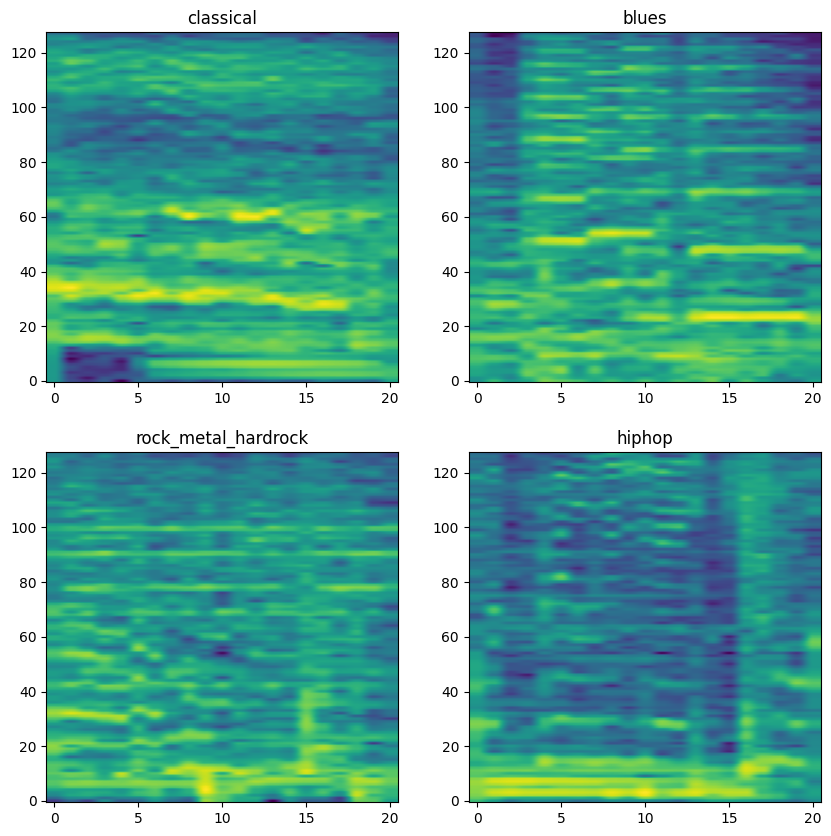

In [2]:
# Step 1
import random
import matplotlib.pyplot as plt

# Loading Training Data
x_train = np.load(main_path + '/train/melgrams/X.npy')
y_train = np.load(main_path + '/train/melgrams/labels.npy')
# Loading Test Data
x_test = np.load(main_path + '/test/melgrams/X.npy')
y_test = np.load(main_path + '/test/melgrams/labels.npy')
# Loading Validation Data
x_val = np.load(main_path + '/val/melgrams/X.npy')
y_val = np.load(main_path + '/val/melgrams/labels.npy')

# Create a list of categories
categories = np.unique(y_train)
categories = list(categories)

# Search for random samples and keep one of each category
random_samples = []
while any(categories):
    r = random.randint(1,len(x_train))
    if (y_train[r] in categories):
        categories.remove(y_train[r])
        random_samples.append((x_train[r],y_train[r])) # return the tuples so we know which graph is which genre when visualizing

plt.figure(figsize=(10, 10))
for i in range(1,5,1):
    plt.subplot(2, 2, i)
    plt.imshow(np.transpose(random_samples[i-1][0]), aspect='auto', origin='lower')
    plt.title(random_samples[i - 1][1])